# Анализ чата телеграм

In [3]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt




### Загрузка
Прочтем файл json

In [4]:
df = pd.read_json('result.json')
df.head()

name                type          id  \
0  Вайб-чек: аналитики  private_supergroup  2104544213   
1  Вайб-чек: аналитики  private_supergroup  2104544213   
2  Вайб-чек: аналитики  private_supergroup  2104544213   
3  Вайб-чек: аналитики  private_supergroup  2104544213   
4  Вайб-чек: аналитики  private_supergroup  2104544213   

                                            messages  
0  {'id': 1, 'type': 'service', 'date': '2024-07-...  
1  {'id': 14, 'type': 'service', 'date': '2024-07...  
2  {'id': 17, 'type': 'service', 'date': '2024-07...  
3  {'id': 42, 'type': 'message', 'date': '2024-08...  
4  {'id': 43, 'type': 'message', 'date': '2024-08...

In [5]:
# Шаг 1: Загрузка JSON файла
with open('result.json') as f:
    data = json.load(f)

# Шаг 2: Преобразование в DataFrame
df = pd.DataFrame(data)

# Шаг 3: Преобразование вложенного словаря messages в отдельные столбцы
messages_df = pd.json_normalize(df['messages'])

# Добавим префикс для столбцов messages_df, чтобы избежать конфликтов имен
messages_df = messages_df.add_prefix('m_')

# Шаг 4: Объединение первоначального DataFrame с распакованными сообщениями
df = df.drop(columns=['messages']).join(messages_df)

# Проверка результата
df.head()




name                type          id  m_id   m_type  \
0  Вайб-чек: аналитики  private_supergroup  2104544213     1  service   
1  Вайб-чек: аналитики  private_supergroup  2104544213    14  service   
2  Вайб-чек: аналитики  private_supergroup  2104544213    17  service   
3  Вайб-чек: аналитики  private_supergroup  2104544213    42  message   
4  Вайб-чек: аналитики  private_supergroup  2104544213    43  message   

                m_date m_date_unixtime              m_actor  \
0  2024-07-31T14:07:30      1722424050  Вайб-чек: аналитики   
1  2024-07-31T19:31:46      1722443506         Galina Sokol   
2  2024-07-31T19:33:10      1722443590         Galina Sokol   
3  2024-08-02T14:36:46      1722598606                  NaN   
4  2024-08-02T14:36:51      1722598611                  NaN   

          m_actor_id            m_action  ... m_media_type m_sticker_emoji  \
0  channel2104544213  migrate_from_group  ...          NaN             NaN   
1      user206144869       topic_created  ...          NaN             NaN   
2      user206144869       topic_created  ...          NaN             NaN   
3                NaN                 NaN  ...          NaN             NaN   
4                NaN                 NaN  ...          NaN             NaN   

  m_mime_type m_poll.question m_poll.closed m_poll.total_voters  \
0         NaN             NaN           NaN                 NaN   
1         NaN             NaN           NaN                 NaN   
2         NaN             NaN           NaN                 NaN   
3         NaN             NaN           NaN                 NaN   
4         NaN             NaN           NaN                 NaN   

  m_poll.answers  m_duration_seconds m_forwarded_from  m_via_bot  
0            NaN                 NaN              NaN        NaN  
1            NaN                 NaN              NaN        NaN  
2            NaN                 NaN              NaN        NaN  
3            NaN                 NaN              NaN        NaN  
4            NaN                 NaN              NaN        NaN  

[5 rows x 34 columns]

In [6]:
df.tail()


name                type          id  m_id   m_type  \
2853  Вайб-чек: аналитики  private_supergroup  2104544213  4566  message   
2854  Вайб-чек: аналитики  private_supergroup  2104544213  4567  message   
2855  Вайб-чек: аналитики  private_supergroup  2104544213  4569  message   
2856  Вайб-чек: аналитики  private_supergroup  2104544213  4571  message   
2857  Вайб-чек: аналитики  private_supergroup  2104544213  4575  message   

                   m_date m_date_unixtime m_actor m_actor_id m_action  ...  \
2853  2024-08-09T21:27:46      1723228066     NaN        NaN      NaN  ...   
2854  2024-08-09T21:35:30      1723228530     NaN        NaN      NaN  ...   
2855  2024-08-09T22:21:14      1723231274     NaN        NaN      NaN  ...   
2856  2024-08-09T22:36:10      1723232170     NaN        NaN      NaN  ...   
2857  2024-08-10T05:47:35      1723258055     NaN        NaN      NaN  ...   

     m_media_type m_sticker_emoji m_mime_type m_poll.question m_poll.closed  \
2853          NaN             NaN         NaN             NaN           NaN   
2854          NaN             NaN         NaN             NaN           NaN   
2855          NaN             NaN         NaN             NaN           NaN   
2856          NaN             NaN         NaN             NaN           NaN   
2857          NaN             NaN         NaN             NaN           NaN   

     m_poll.total_voters m_poll.answers  m_duration_seconds m_forwarded_from  \
2853                 NaN            NaN                 NaN              NaN   
2854                 NaN            NaN                 NaN              NaN   
2855                 NaN            NaN                 NaN              NaN   
2856                 NaN            NaN                 NaN              NaN   
2857                 NaN            NaN                 NaN              NaN   

      m_via_bot  
2853        NaN  
2854        NaN  
2855        NaN  
2856        NaN  
2857        NaN  

[5 rows x 34 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2858 non-null   object 
 1   type                   2858 non-null   object 
 2   id                     2858 non-null   int64  
 3   m_id                   2858 non-null   int64  
 4   m_type                 2858 non-null   object 
 5   m_date                 2858 non-null   object 
 6   m_date_unixtime        2858 non-null   object 
 7   m_actor                6 non-null      object 
 8   m_actor_id             6 non-null      object 
 9   m_action               6 non-null      object 
 10  m_title                6 non-null      object 
 11  m_text                 2858 non-null   object 
 12  m_text_entities        2858 non-null   object 
 13  m_edited               1896 non-null   object 
 14  m_edited_unixtime      1896 non-null   object 
 15  m_fr

### Предобработка

In [8]:
# Оставим только нужные колонки
df2 = df[['m_from', 'm_from_id', 'm_text', 'm_date']]
df2

m_from          m_from_id  \
0                     NaN                NaN   
1                     NaN                NaN   
2                     NaN                NaN   
3     Вайб-чек: аналитики  channel2104544213   
4     Вайб-чек: аналитики  channel2104544213   
...                   ...                ...   
2853               Nataly      user241881858   
2854        Alexei Klokov      user201241651   
2855         Sergey Rudov      user156242779   
2856         Doppelgänger      user299711326   
2857         Sergey Rudov      user156242779   

                                                 m_text               m_date  
0                                                        2024-07-31T14:07:30  
1                                                        2024-07-31T19:31:46  
2                                                        2024-07-31T19:33:10  
3     [Привет! Мы пишем это сообщение, пока чат почт...  2024-08-02T14:36:46  
4     [{'type': 'bold', 'text': 'Вопросы ментору
'},...  2024-08-02T14:36:51  
...                                                 ...                  ...  
2853  Спасибо за организацию! Вы большие молодцы! Мн...  2024-08-09T21:27:46  
2854  Всем большущее спасибо за этот движ! И организ...  2024-08-09T21:35:30  
2855            Как так... Почему тут только один лайк?  2024-08-09T22:21:14  
2856  Спасибо большое за мероприятие! Честно, я бы д...  2024-08-09T22:36:10  
2857  Разные люди, специалисты, и не очень - имеют в...  2024-08-10T05:47:35  

[2858 rows x 4 columns]

In [9]:
# Удалим пустые ячейки из колонки с текстом (пустые - это системные)
df2 = df2.dropna(subset=['m_text'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   m_from     2852 non-null   object
 1   m_from_id  2852 non-null   object
 2   m_text     2858 non-null   object
 3   m_date     2858 non-null   object
dtypes: object(4)
memory usage: 89.4+ KB


Почему-то у нас не совпадает кол-во сообщений и кол-во писавших

In [10]:
df2
# есть пропуски в m_from и m_from_id	 их тоже удалим

m_from          m_from_id  \
0                     NaN                NaN   
1                     NaN                NaN   
2                     NaN                NaN   
3     Вайб-чек: аналитики  channel2104544213   
4     Вайб-чек: аналитики  channel2104544213   
...                   ...                ...   
2853               Nataly      user241881858   
2854        Alexei Klokov      user201241651   
2855         Sergey Rudov      user156242779   
2856         Doppelgänger      user299711326   
2857         Sergey Rudov      user156242779   

                                                 m_text               m_date  
0                                                        2024-07-31T14:07:30  
1                                                        2024-07-31T19:31:46  
2                                                        2024-07-31T19:33:10  
3     [Привет! Мы пишем это сообщение, пока чат почт...  2024-08-02T14:36:46  
4     [{'type': 'bold', 'text': 'Вопросы ментору
'},...  2024-08-02T14:36:51  
...                                                 ...                  ...  
2853  Спасибо за организацию! Вы большие молодцы! Мн...  2024-08-09T21:27:46  
2854  Всем большущее спасибо за этот движ! И организ...  2024-08-09T21:35:30  
2855            Как так... Почему тут только один лайк?  2024-08-09T22:21:14  
2856  Спасибо большое за мероприятие! Честно, я бы д...  2024-08-09T22:36:10  
2857  Разные люди, специалисты, и не очень - имеют в...  2024-08-10T05:47:35  

[2858 rows x 4 columns]

In [11]:
df2 = df2.dropna(subset=['m_from'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2852 entries, 3 to 2857
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   m_from     2852 non-null   object
 1   m_from_id  2852 non-null   object
 2   m_text     2852 non-null   object
 3   m_date     2852 non-null   object
dtypes: object(4)
memory usage: 111.4+ KB


In [12]:
# Переименуем колонки для красоты
df2 = df2.rename(columns={
    'm_from': 'user',
    'm_from_id': 'user_id',
    'm_text': 'message',
    'm_date': 'date'
})
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2852 entries, 3 to 2857
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user     2852 non-null   object
 1   user_id  2852 non-null   object
 2   message  2852 non-null   object
 3   date     2852 non-null   object
dtypes: object(4)
memory usage: 111.4+ KB


### Небольшая предварительная аналитика

In [13]:
# Проверик кол-во уникальных юзеров
df2['user'].nunique()

186

In [14]:
# Проверим кол-во уникальных user_id
df2['user_id'].nunique()

192

Видно, что поле user не является уникальным, поэтому для расчетов будем использовать поле  *user_id*

Посмотрим топ-юзеров по кол-ву сообщений

In [15]:
# Группировка по пользователям и подсчет количества сообщений
user_message_counts = df2.groupby(['user', 'user_id']).size().reset_index(name='message_count')

# Сортировка по количеству сообщений в порядке убывания и выбор топ-10 пользователей
top_10_users = user_message_counts.sort_values(by='message_count', ascending=False).head(10).to_string(index=False)

# Вывод результата
print(top_10_users)

                  user           user_id  message_count
             Valeratal     user252926140            208
   Вайб-чек: аналитики channel2104544213            154
            Svetlana G    user1611482939            110
                 Елена     user539964200            108
               Alex mi     user887595567            108
       Алексей Новиков     user539516512             82
                Nataly     user241881858             66
                   화 첸     user383259871             63
Руслан Project&Product     user624594545             63
       Alexey Gavrilov     user886005555             52


У нас есть неуникальные имена (user), которые будут мешать при построении дашбордов в PowerBI, поэтому их надо как-то уникализировать

Есть 2 варианта
 1. добавить двойку ко второму такому же значению user
 2. Соединить 2 поля user и user_id

 Я выберу второй путь

In [16]:
df2['uu_id'] = df2['user']  + ' ' + '(' + df2['user_id'] + ')'
df2


user            user_id  \
3     Вайб-чек: аналитики  channel2104544213   
4     Вайб-чек: аналитики  channel2104544213   
5     Вайб-чек: аналитики  channel2104544213   
6     Вайб-чек: аналитики  channel2104544213   
7         Mohmad Askhabov      user270302163   
...                   ...                ...   
2853               Nataly      user241881858   
2854        Alexei Klokov      user201241651   
2855         Sergey Rudov      user156242779   
2856         Doppelgänger      user299711326   
2857         Sergey Rudov      user156242779   

                                                message                 date  \
3     [Привет! Мы пишем это сообщение, пока чат почт...  2024-08-02T14:36:46   
4     [{'type': 'bold', 'text': 'Вопросы ментору
'},...  2024-08-02T14:36:51   
5     [Привет! \n\n, {'type': 'bold', 'text': 'Здесь...  2024-08-02T14:38:01   
6     [Привет! \n\nЗдесь можно (и нужно) задавать во...  2024-08-02T14:38:55   
7                 Всем привет!) Уже не терпится начать)  2024-08-04T12:14:35   
...                                                 ...                  ...   
2853  Спасибо за организацию! Вы большие молодцы! Мн...  2024-08-09T21:27:46   
2854  Всем большущее спасибо за этот движ! И организ...  2024-08-09T21:35:30   
2855            Как так... Почему тут только один лайк?  2024-08-09T22:21:14   
2856  Спасибо большое за мероприятие! Честно, я бы д...  2024-08-09T22:36:10   
2857  Разные люди, специалисты, и не очень - имеют в...  2024-08-10T05:47:35   

                                        uu_id  
3     Вайб-чек: аналитики (channel2104544213)  
4     Вайб-чек: аналитики (channel2104544213)  
5     Вайб-чек: аналитики (channel2104544213)  
6     Вайб-чек: аналитики (channel2104544213)  
7             Mohmad Askhabov (user270302163)  
...                                       ...  
2853                   Nataly (user241881858)  
2854            Alexei Klokov (user201241651)  
2855             Sergey Rudov (user156242779)  
2856             Doppelgänger (user299711326)  
2857             Sergey Rudov (user156242779)  

[2852 rows x 5 columns]

### Займемся текстовым полем

Посчитаем длину сообщений и заведем в поле

In [17]:
df2['len_m'] = df2['message'].str.len()
df2

user            user_id  \
3     Вайб-чек: аналитики  channel2104544213   
4     Вайб-чек: аналитики  channel2104544213   
5     Вайб-чек: аналитики  channel2104544213   
6     Вайб-чек: аналитики  channel2104544213   
7         Mohmad Askhabov      user270302163   
...                   ...                ...   
2853               Nataly      user241881858   
2854        Alexei Klokov      user201241651   
2855         Sergey Rudov      user156242779   
2856         Doppelgänger      user299711326   
2857         Sergey Rudov      user156242779   

                                                message                 date  \
3     [Привет! Мы пишем это сообщение, пока чат почт...  2024-08-02T14:36:46   
4     [{'type': 'bold', 'text': 'Вопросы ментору
'},...  2024-08-02T14:36:51   
5     [Привет! \n\n, {'type': 'bold', 'text': 'Здесь...  2024-08-02T14:38:01   
6     [Привет! \n\nЗдесь можно (и нужно) задавать во...  2024-08-02T14:38:55   
7                 Всем привет!) Уже не терпится начать)  2024-08-04T12:14:35   
...                                                 ...                  ...   
2853  Спасибо за организацию! Вы большие молодцы! Мн...  2024-08-09T21:27:46   
2854  Всем большущее спасибо за этот движ! И организ...  2024-08-09T21:35:30   
2855            Как так... Почему тут только один лайк?  2024-08-09T22:21:14   
2856  Спасибо большое за мероприятие! Честно, я бы д...  2024-08-09T22:36:10   
2857  Разные люди, специалисты, и не очень - имеют в...  2024-08-10T05:47:35   

                                        uu_id  len_m  
3     Вайб-чек: аналитики (channel2104544213)     62  
4     Вайб-чек: аналитики (channel2104544213)      8  
5     Вайб-чек: аналитики (channel2104544213)      7  
6     Вайб-чек: аналитики (channel2104544213)     21  
7             Mohmad Askhabov (user270302163)     37  
...                                       ...    ...  
2853                   Nataly (user241881858)    339  
2854            Alexei Klokov (user201241651)    195  
2855             Sergey Rudov (user156242779)     39  
2856             Doppelgänger (user299711326)    634  
2857             Sergey Rudov (user156242779)    299  

[2852 rows x 6 columns]

Проверим, посмотрим минимальные и максимальные значения в колонке *len_m* (длина сообщения)

In [18]:
df_sorted_desc = df2.sort_values(by='len_m', ascending=False)
df_sorted_desc

user         user_id  \
870      Андрей Тюрин   user362209236   
2753           Hayato  user1084897149   
1801           Marina  user1298559417   
2428    Игорь Жильцов  user5608442745   
1923         Veniamin  user1007801492   
...               ...             ...   
1630    Roman Harbard   user735360229   
1629   Denis Vakhitov   user270381187   
1628             Анна   user470770771   
464   Alexey Gavrilov   user886005555   
1893  Alexey Gavrilov   user886005555   

                                                message                 date  \
870   Работать начал с 13 лет - в нашей школе органи...  2024-08-05T17:52:17   
2753  Сидя в кругу у костра в пещере, я почувствовал...  2024-08-09T14:23:55   
1801  Тут вопрос ещё как кого классифицировать\nЯ ан...  2024-08-07T14:55:19   
2428  1. Подтянуть алгоритмы на python'e, я вот стар...  2024-08-08T16:27:14   
1923  Я тоже повспоминаю учёбу в университете. Как-т...  2024-08-07T18:23:59   
...                                                 ...                  ...   
1630                                                     2024-08-07T10:29:04   
1629                                                     2024-08-07T10:28:24   
1628                                                     2024-08-07T10:25:47   
464                                                      2024-08-05T12:08:00   
1893                                                     2024-08-07T17:16:00   

                                uu_id  len_m  
870      Андрей Тюрин (user362209236)   1568  
2753          Hayato (user1084897149)   1555  
1801          Marina (user1298559417)   1538  
2428   Игорь Жильцов (user5608442745)   1521  
1923        Veniamin (user1007801492)   1484  
...                               ...    ...  
1630    Roman Harbard (user735360229)      0  
1629   Denis Vakhitov (user270381187)      0  
1628             Анна (user470770771)      0  
464   Alexey Gavrilov (user886005555)      0  
1893  Alexey Gavrilov (user886005555)      0  

[2852 rows x 6 columns]

Видим нулевые значения. Нам они не нужны, смело удаляем

In [19]:
# Удаление строк, где значения в колонке len_m равны нулю
df2 = df2[df2['len_m'] != 0]

Проверяем

In [20]:
df_sorted_desc = df2.sort_values(by='len_m', ascending=False)
df_sorted_desc

user         user_id  \
870      Андрей Тюрин   user362209236   
2753           Hayato  user1084897149   
1801           Marina  user1298559417   
2428    Игорь Жильцов  user5608442745   
1923         Veniamin  user1007801492   
...               ...             ...   
2241  Дмитрий Щавелев  user5114780012   
2239  Оксана Смирнова  user1382038652   
2182        Valeratal   user252926140   
138         Valeratal   user252926140   
226            Marina  user1298559417   

                                                message                 date  \
870   Работать начал с 13 лет - в нашей школе органи...  2024-08-05T17:52:17   
2753  Сидя в кругу у костра в пещере, я почувствовал...  2024-08-09T14:23:55   
1801  Тут вопрос ещё как кого классифицировать\nЯ ан...  2024-08-07T14:55:19   
2428  1. Подтянуть алгоритмы на python'e, я вот стар...  2024-08-08T16:27:14   
1923  Я тоже повспоминаю учёбу в университете. Как-т...  2024-08-07T18:23:59   
...                                                 ...                  ...   
2241       [{'type': 'mention', 'text': '@oksik_smir'}]  2024-08-08T13:48:26   
2239       [{'type': 'mention', 'text': '@i_rusetska'}]  2024-08-08T13:47:10   
2182         [{'type': 'mention', 'text': '@staisiya'}]  2024-08-08T13:07:11   
138   [{'type': 'link', 'text': 'https://vibe.habr.c...  2024-08-04T15:53:58   
226   [{'type': 'link', 'text': 'https://vibe.habr.c...  2024-08-04T19:13:21   

                                 uu_id  len_m  
870       Андрей Тюрин (user362209236)   1568  
2753           Hayato (user1084897149)   1555  
1801           Marina (user1298559417)   1538  
2428    Игорь Жильцов (user5608442745)   1521  
1923         Veniamin (user1007801492)   1484  
...                                ...    ...  
2241  Дмитрий Щавелев (user5114780012)      1  
2239  Оксана Смирнова (user1382038652)      1  
2182         Valeratal (user252926140)      1  
138          Valeratal (user252926140)      1  
226            Marina (user1298559417)      1  

[2624 rows x 6 columns]

Значения в 1 тоже можно удалить. это видимо просто реакции

In [21]:
# Удаление строк, где значения в колонке len_m равны нулю
df2 = df2[df2['len_m'] != 1]
df_sorted_desc = df2.sort_values(by='len_m', ascending=False)
df_sorted_desc

user         user_id  \
870      Андрей Тюрин   user362209236   
2753           Hayato  user1084897149   
1801           Marina  user1298559417   
2428    Игорь Жильцов  user5608442745   
1923         Veniamin  user1007801492   
...               ...             ...   
2243        Valeratal   user252926140   
2242  Оксана Смирнова  user1382038652   
2234  Оксана Смирнова  user1382038652   
190   Елена Котелевец   user918686217   
1778            Павел   user532993017   

                                                message                 date  \
870   Работать начал с 13 лет - в нашей школе органи...  2024-08-05T17:52:17   
2753  Сидя в кругу у костра в пещере, я почувствовал...  2024-08-09T14:23:55   
1801  Тут вопрос ещё как кого классифицировать\nЯ ан...  2024-08-07T14:55:19   
2428  1. Подтянуть алгоритмы на python'e, я вот стар...  2024-08-08T16:27:14   
1923  Я тоже повспоминаю учёбу в университете. Как-т...  2024-08-07T18:23:59   
...                                                 ...                  ...   
2243  [{'type': 'mention', 'text': '@oksik_smir'},  ...  2024-08-08T13:48:41   
2242  [{'type': 'mention', 'text': '@mark_nataly'}, ...  2024-08-08T13:48:35   
2234  [{'type': 'mention', 'text': '@Valeratal'},  з...  2024-08-08T13:46:41   
190                                                  Да  2024-08-04T17:07:50   
1778  [{'type': 'pre', 'text': 'import random

optio...  2024-08-07T14:15:48   

                                 uu_id  len_m  
870       Андрей Тюрин (user362209236)   1568  
2753           Hayato (user1084897149)   1555  
1801           Marina (user1298559417)   1538  
2428    Игорь Жильцов (user5608442745)   1521  
1923         Veniamin (user1007801492)   1484  
...                                ...    ...  
2243         Valeratal (user252926140)      2  
2242  Оксана Смирнова (user1382038652)      2  
2234  Оксана Смирнова (user1382038652)      2  
190    Елена Котелевец (user918686217)      2  
1778             Павел (user532993017)      2  

[2545 rows x 6 columns]

Видим, что малые значения считаются некорректно

Проблема заключается в том, что колонка message содержит не только текст, но и элементы, которые являются списками или словарями. Когда мы применяем метод str.len(), он подсчитывает количество элементов в объекте, а не длину текста внутри этих элементов. В данном случае, поскольку у нас есть список с двумя элементами (словарь и строка), метод возвращает длину списка (то есть 2).

Чтобы корректно посчитать длину текста, нужно сначала преобразовать все элементы в строку и затем посчитать их длину. Можно сделать это с помощью комбинации методов str и apply.


In [22]:
# Преобразование всех элементов в строку и подсчет длины
df2['len_m2'] = df2['message'].apply(lambda x: len(str(x)))

# выведем в отсортированном виде
df_sorted_desc = df2.sort_values(by='len_m', ascending=False)
df_sorted_desc

user         user_id  \
870      Андрей Тюрин   user362209236   
2753           Hayato  user1084897149   
1801           Marina  user1298559417   
2428    Игорь Жильцов  user5608442745   
1923         Veniamin  user1007801492   
...               ...             ...   
2243        Valeratal   user252926140   
2242  Оксана Смирнова  user1382038652   
2234  Оксана Смирнова  user1382038652   
190   Елена Котелевец   user918686217   
1778            Павел   user532993017   

                                                message                 date  \
870   Работать начал с 13 лет - в нашей школе органи...  2024-08-05T17:52:17   
2753  Сидя в кругу у костра в пещере, я почувствовал...  2024-08-09T14:23:55   
1801  Тут вопрос ещё как кого классифицировать\nЯ ан...  2024-08-07T14:55:19   
2428  1. Подтянуть алгоритмы на python'e, я вот стар...  2024-08-08T16:27:14   
1923  Я тоже повспоминаю учёбу в университете. Как-т...  2024-08-07T18:23:59   
...                                                 ...                  ...   
2243  [{'type': 'mention', 'text': '@oksik_smir'},  ...  2024-08-08T13:48:41   
2242  [{'type': 'mention', 'text': '@mark_nataly'}, ...  2024-08-08T13:48:35   
2234  [{'type': 'mention', 'text': '@Valeratal'},  з...  2024-08-08T13:46:41   
190                                                  Да  2024-08-04T17:07:50   
1778  [{'type': 'pre', 'text': 'import random

optio...  2024-08-07T14:15:48   

                                 uu_id  len_m  len_m2  
870       Андрей Тюрин (user362209236)   1568    1568  
2753           Hayato (user1084897149)   1555    1555  
1801           Marina (user1298559417)   1538    1538  
2428    Игорь Жильцов (user5608442745)   1521    1521  
1923         Veniamin (user1007801492)   1484    1484  
...                                ...    ...     ...  
2243         Valeratal (user252926140)      2      56  
2242  Оксана Смирнова (user1382038652)      2      98  
2234  Оксана Смирнова (user1382038652)      2      77  
190    Елена Котелевец (user918686217)      2       2  
1778             Павел (user532993017)      2     231  

[2545 rows x 7 columns]

Видим проблему, что служебные символы тоже считаются (типа type, скобки и тд)

Нам это не надо, поэтому будем извлекать текст

In [23]:
# Функция для извлечения текста из сложных объектов
def extract_text(message):
    if isinstance(message, list):
        # Обрабатываем каждый элемент списка
        return ' '.join([item['text'] if isinstance(item, dict) else item for item in message])
    elif isinstance(message, dict):
        # Обрабатываем случай, если это один словарь
        return message.get('text', '')
    else:
        # Если это просто строка
        return message

# Применение функции к колонке message
df2['message'] = df2['message'].apply(extract_text)

# Выведем
df2


user            user_id  \
3     Вайб-чек: аналитики  channel2104544213   
4     Вайб-чек: аналитики  channel2104544213   
5     Вайб-чек: аналитики  channel2104544213   
6     Вайб-чек: аналитики  channel2104544213   
7         Mohmad Askhabov      user270302163   
...                   ...                ...   
2853               Nataly      user241881858   
2854        Alexei Klokov      user201241651   
2855         Sergey Rudov      user156242779   
2856         Doppelgänger      user299711326   
2857         Sergey Rudov      user156242779   

                                                message                 date  \
3     Привет! Мы пишем это сообщение, пока чат почти...  2024-08-02T14:36:46   
4     Вопросы ментору\n В этот раз вместе с нами в ч...  2024-08-02T14:36:51   
5     Привет! \n\n Здесь всю неделю с 5 по 11 август...  2024-08-02T14:38:01   
6     Привет! \n\nЗдесь можно (и нужно) задавать воп...  2024-08-02T14:38:55   
7                 Всем привет!) Уже не терпится начать)  2024-08-04T12:14:35   
...                                                 ...                  ...   
2853  Спасибо за организацию! Вы большие молодцы! Мн...  2024-08-09T21:27:46   
2854  Всем большущее спасибо за этот движ! И организ...  2024-08-09T21:35:30   
2855            Как так... Почему тут только один лайк?  2024-08-09T22:21:14   
2856  Спасибо большое за мероприятие! Честно, я бы д...  2024-08-09T22:36:10   
2857  Разные люди, специалисты, и не очень - имеют в...  2024-08-10T05:47:35   

                                        uu_id  len_m  len_m2  
3     Вайб-чек: аналитики (channel2104544213)     62    5867  
4     Вайб-чек: аналитики (channel2104544213)      8     543  
5     Вайб-чек: аналитики (channel2104544213)      7     533  
6     Вайб-чек: аналитики (channel2104544213)     21    1161  
7             Mohmad Askhabov (user270302163)     37      37  
...                                       ...    ...     ...  
2853                   Nataly (user241881858)    339     339  
2854            Alexei Klokov (user201241651)    195     195  
2855             Sergey Rudov (user156242779)     39      39  
2856             Doppelgänger (user299711326)    634     634  
2857             Sergey Rudov (user156242779)    299     299  

[2545 rows x 7 columns]

In [24]:
df_sorted_desc = df2.sort_values(by='len_m', ascending=False)
df_sorted_desc

user         user_id  \
870      Андрей Тюрин   user362209236   
2753           Hayato  user1084897149   
1801           Marina  user1298559417   
2428    Игорь Жильцов  user5608442745   
1923         Veniamin  user1007801492   
...               ...             ...   
2243        Valeratal   user252926140   
2242  Оксана Смирнова  user1382038652   
2234  Оксана Смирнова  user1382038652   
190   Елена Котелевец   user918686217   
1778            Павел   user532993017   

                                                message                 date  \
870   Работать начал с 13 лет - в нашей школе органи...  2024-08-05T17:52:17   
2753  Сидя в кругу у костра в пещере, я почувствовал...  2024-08-09T14:23:55   
1801  Тут вопрос ещё как кого классифицировать\nЯ ан...  2024-08-07T14:55:19   
2428  1. Подтянуть алгоритмы на python'e, я вот стар...  2024-08-08T16:27:14   
1923  Я тоже повспоминаю учёбу в университете. Как-т...  2024-08-07T18:23:59   
...                                                 ...                  ...   
2243                               @oksik_smir  спасибо  2024-08-08T13:48:41   
2242  @mark_nataly  спасибо за то что лайкаешь все п...  2024-08-08T13:48:35   
2234          @Valeratal  за активнейшее участие в чате  2024-08-08T13:46:41   
190                                                  Да  2024-08-04T17:07:50   
1778  import random\n\noptions = ["скоро дедлайн", "...  2024-08-07T14:15:48   

                                 uu_id  len_m  len_m2  
870       Андрей Тюрин (user362209236)   1568    1568  
2753           Hayato (user1084897149)   1555    1555  
1801           Marina (user1298559417)   1538    1538  
2428    Игорь Жильцов (user5608442745)   1521    1521  
1923         Veniamin (user1007801492)   1484    1484  
...                                ...    ...     ...  
2243         Valeratal (user252926140)      2      56  
2242  Оксана Смирнова (user1382038652)      2      98  
2234  Оксана Смирнова (user1382038652)      2      77  
190    Елена Котелевец (user918686217)      2       2  
1778             Павел (user532993017)      2     231  

[2545 rows x 7 columns]

Переименуем колонки и снова отсортируем

In [25]:
df2 = df2.rename(columns={'len_m': 'len_m_old', 'len_m2': 'len_m'})

In [26]:
df_sorted_desc = df2.sort_values(by='len_m', ascending=False)
df_sorted_desc

user            user_id  \
3        Вайб-чек: аналитики  channel2104544213   
2788           Павел (SMLab)      user136425862   
2812     Вайб-чек: аналитики  channel2104544213   
2494     Вайб-чек: аналитики  channel2104544213   
1334  Руслан Project&Product      user624594545   
...                      ...                ...   
1804                  Marina     user1298559417   
30            Inna Profatilo      user626261098   
2394                 Alex mi      user887595567   
2606         Alexey Gavrilov      user886005555   
190          Елена Котелевец      user918686217   

                                                message                 date  \
3     Привет! Мы пишем это сообщение, пока чат почти...  2024-08-02T14:36:46   
2788  Отвечает,  #SMLab \n\n 1) Почему сложно найти ...  2024-08-09T17:16:56   
2812  🏁  Вы добрались до клетки Финиш в карьерной на...  2024-08-09T19:00:17   
2494  ⭐️  Команде Nexign было сложно выбирать ответы...  2024-08-08T18:53:11   
1334  Давайте проведем анализ текста по содержанию и...  2024-08-06T15:07:24   
...                                                 ...                  ...   
1804                                                 Да  2024-08-07T15:12:23   
30                                                   Да  2024-08-04T12:32:56   
2394                                                 ☝️  2024-08-08T16:01:39   
2606                                                 Да  2024-08-08T22:48:53   
190                                                  Да  2024-08-04T17:07:50   

                                        uu_id  len_m_old  len_m  
3     Вайб-чек: аналитики (channel2104544213)         62   5867  
2788            Павел (SMLab) (user136425862)         43   3662  
2812  Вайб-чек: аналитики (channel2104544213)         55   3499  
2494  Вайб-чек: аналитики (channel2104544213)         68   2816  
1334   Руслан Project&Product (user624594545)         11   2760  
...                                       ...        ...    ...  
1804                  Marina (user1298559417)          2      2  
30             Inna Profatilo (user626261098)          2      2  
2394                  Alex mi (user887595567)          2      2  
2606          Alexey Gavrilov (user886005555)          2      2  
190           Елена Котелевец (user918686217)          2      2  

[2545 rows x 7 columns]

Поменяем местами колонки

In [27]:
# Выведем список колонок
df2.columns

Index(['user', 'user_id', 'message', 'date', 'uu_id', 'len_m_old', 'len_m'], dtype='object')

In [28]:
df2 = df2[['user', 'user_id', 'message', 'date', 'uu_id', 'len_m', 'len_m_old']]
df2

user            user_id  \
3     Вайб-чек: аналитики  channel2104544213   
4     Вайб-чек: аналитики  channel2104544213   
5     Вайб-чек: аналитики  channel2104544213   
6     Вайб-чек: аналитики  channel2104544213   
7         Mohmad Askhabov      user270302163   
...                   ...                ...   
2853               Nataly      user241881858   
2854        Alexei Klokov      user201241651   
2855         Sergey Rudov      user156242779   
2856         Doppelgänger      user299711326   
2857         Sergey Rudov      user156242779   

                                                message                 date  \
3     Привет! Мы пишем это сообщение, пока чат почти...  2024-08-02T14:36:46   
4     Вопросы ментору\n В этот раз вместе с нами в ч...  2024-08-02T14:36:51   
5     Привет! \n\n Здесь всю неделю с 5 по 11 август...  2024-08-02T14:38:01   
6     Привет! \n\nЗдесь можно (и нужно) задавать воп...  2024-08-02T14:38:55   
7                 Всем привет!) Уже не терпится начать)  2024-08-04T12:14:35   
...                                                 ...                  ...   
2853  Спасибо за организацию! Вы большие молодцы! Мн...  2024-08-09T21:27:46   
2854  Всем большущее спасибо за этот движ! И организ...  2024-08-09T21:35:30   
2855            Как так... Почему тут только один лайк?  2024-08-09T22:21:14   
2856  Спасибо большое за мероприятие! Честно, я бы д...  2024-08-09T22:36:10   
2857  Разные люди, специалисты, и не очень - имеют в...  2024-08-10T05:47:35   

                                        uu_id  len_m  len_m_old  
3     Вайб-чек: аналитики (channel2104544213)   5867         62  
4     Вайб-чек: аналитики (channel2104544213)    543          8  
5     Вайб-чек: аналитики (channel2104544213)    533          7  
6     Вайб-чек: аналитики (channel2104544213)   1161         21  
7             Mohmad Askhabov (user270302163)     37         37  
...                                       ...    ...        ...  
2853                   Nataly (user241881858)    339        339  
2854            Alexei Klokov (user201241651)    195        195  
2855             Sergey Rudov (user156242779)     39         39  
2856             Doppelgänger (user299711326)    634        634  
2857             Sergey Rudov (user156242779)    299        299  

[2545 rows x 7 columns]

In [29]:
# Запись обновлённого DataFrame в CSV-файл
df2.to_csv('df2.csv', index=False)

##Посчитаем кол-во упоминаний ключевых слов

Например SQL

In [30]:
#df2['sql_count'] = df2['message'].str.count('SQL')
#df2

Этот вариант не очень хороший, поэтому будем использовать другой

In [31]:
#Определение списка слов для поиска
words_to_count = ['SQL', 'Python', 'Excel', 'VBA']

 #Подсчет количества слов
def count_words(row):
    counts = {}
    # Проверяем, является ли значение строкой, прежде чем применять split
    message = str(row['message']) if isinstance(row['message'], str) else ''
    for word in words_to_count:
        counts[word] = message.split().count(word)
    return pd.Series(counts)

df_counts = df2.apply(count_words, axis=1)

#  Сохранение результатов в новый DataFrame
result_df = pd.DataFrame(df_counts.sum()).reset_index()
result_df.columns = ['Word', 'Count']
print(result_df)

#result_df.to_csv('output.csv', index=False)

     Word  Count
0     SQL     26
1  Python     10
2   Excel      9
3     VBA      3


## Облако слов
Создадим облако слов

In [32]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32897 sha256=eac77ecf3d42fc80b91177177e1b89623f341223856020552d09fd4fdc4d3acb
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


Сохраним все сообщения и почистим

In [33]:
# Объединение всех строк из колонки 'message' в одну строку
text = df2['message'].str.cat(sep=' ')

In [34]:
# Очищаем текст с помощью регулярных выражений
text = re.sub(r'==.*?==+', '', text) # удаляем лишние символы
text = text.replace('\n', '') # удаляем знаки разделения на абзацы

In [35]:
# text

In [36]:
# Команда %matplotlib inline указывает, что графики будут отрисованы прямо в блокноте колаба, а не где-то в отдельном окне.
%matplotlib inline

Используем функцию для визуализации

Функция plot_cloud принимает параметром облако слов (мы создадим его ниже), устанавливает размер картинки в дюймах и выводит её, а метод axis c аргументом «off» отключает подписи внизу и слева.

In [37]:
# Функция для визуализации облака слов
def plot_cloud(wordcloud):
    # Устанавливаем размер картинки
    plt.figure(figsize=(40, 30))
    # Показать изображение
    plt.imshow(wordcloud)
    # Без подписей на осях
    plt.axis("off")

Создаим картинку

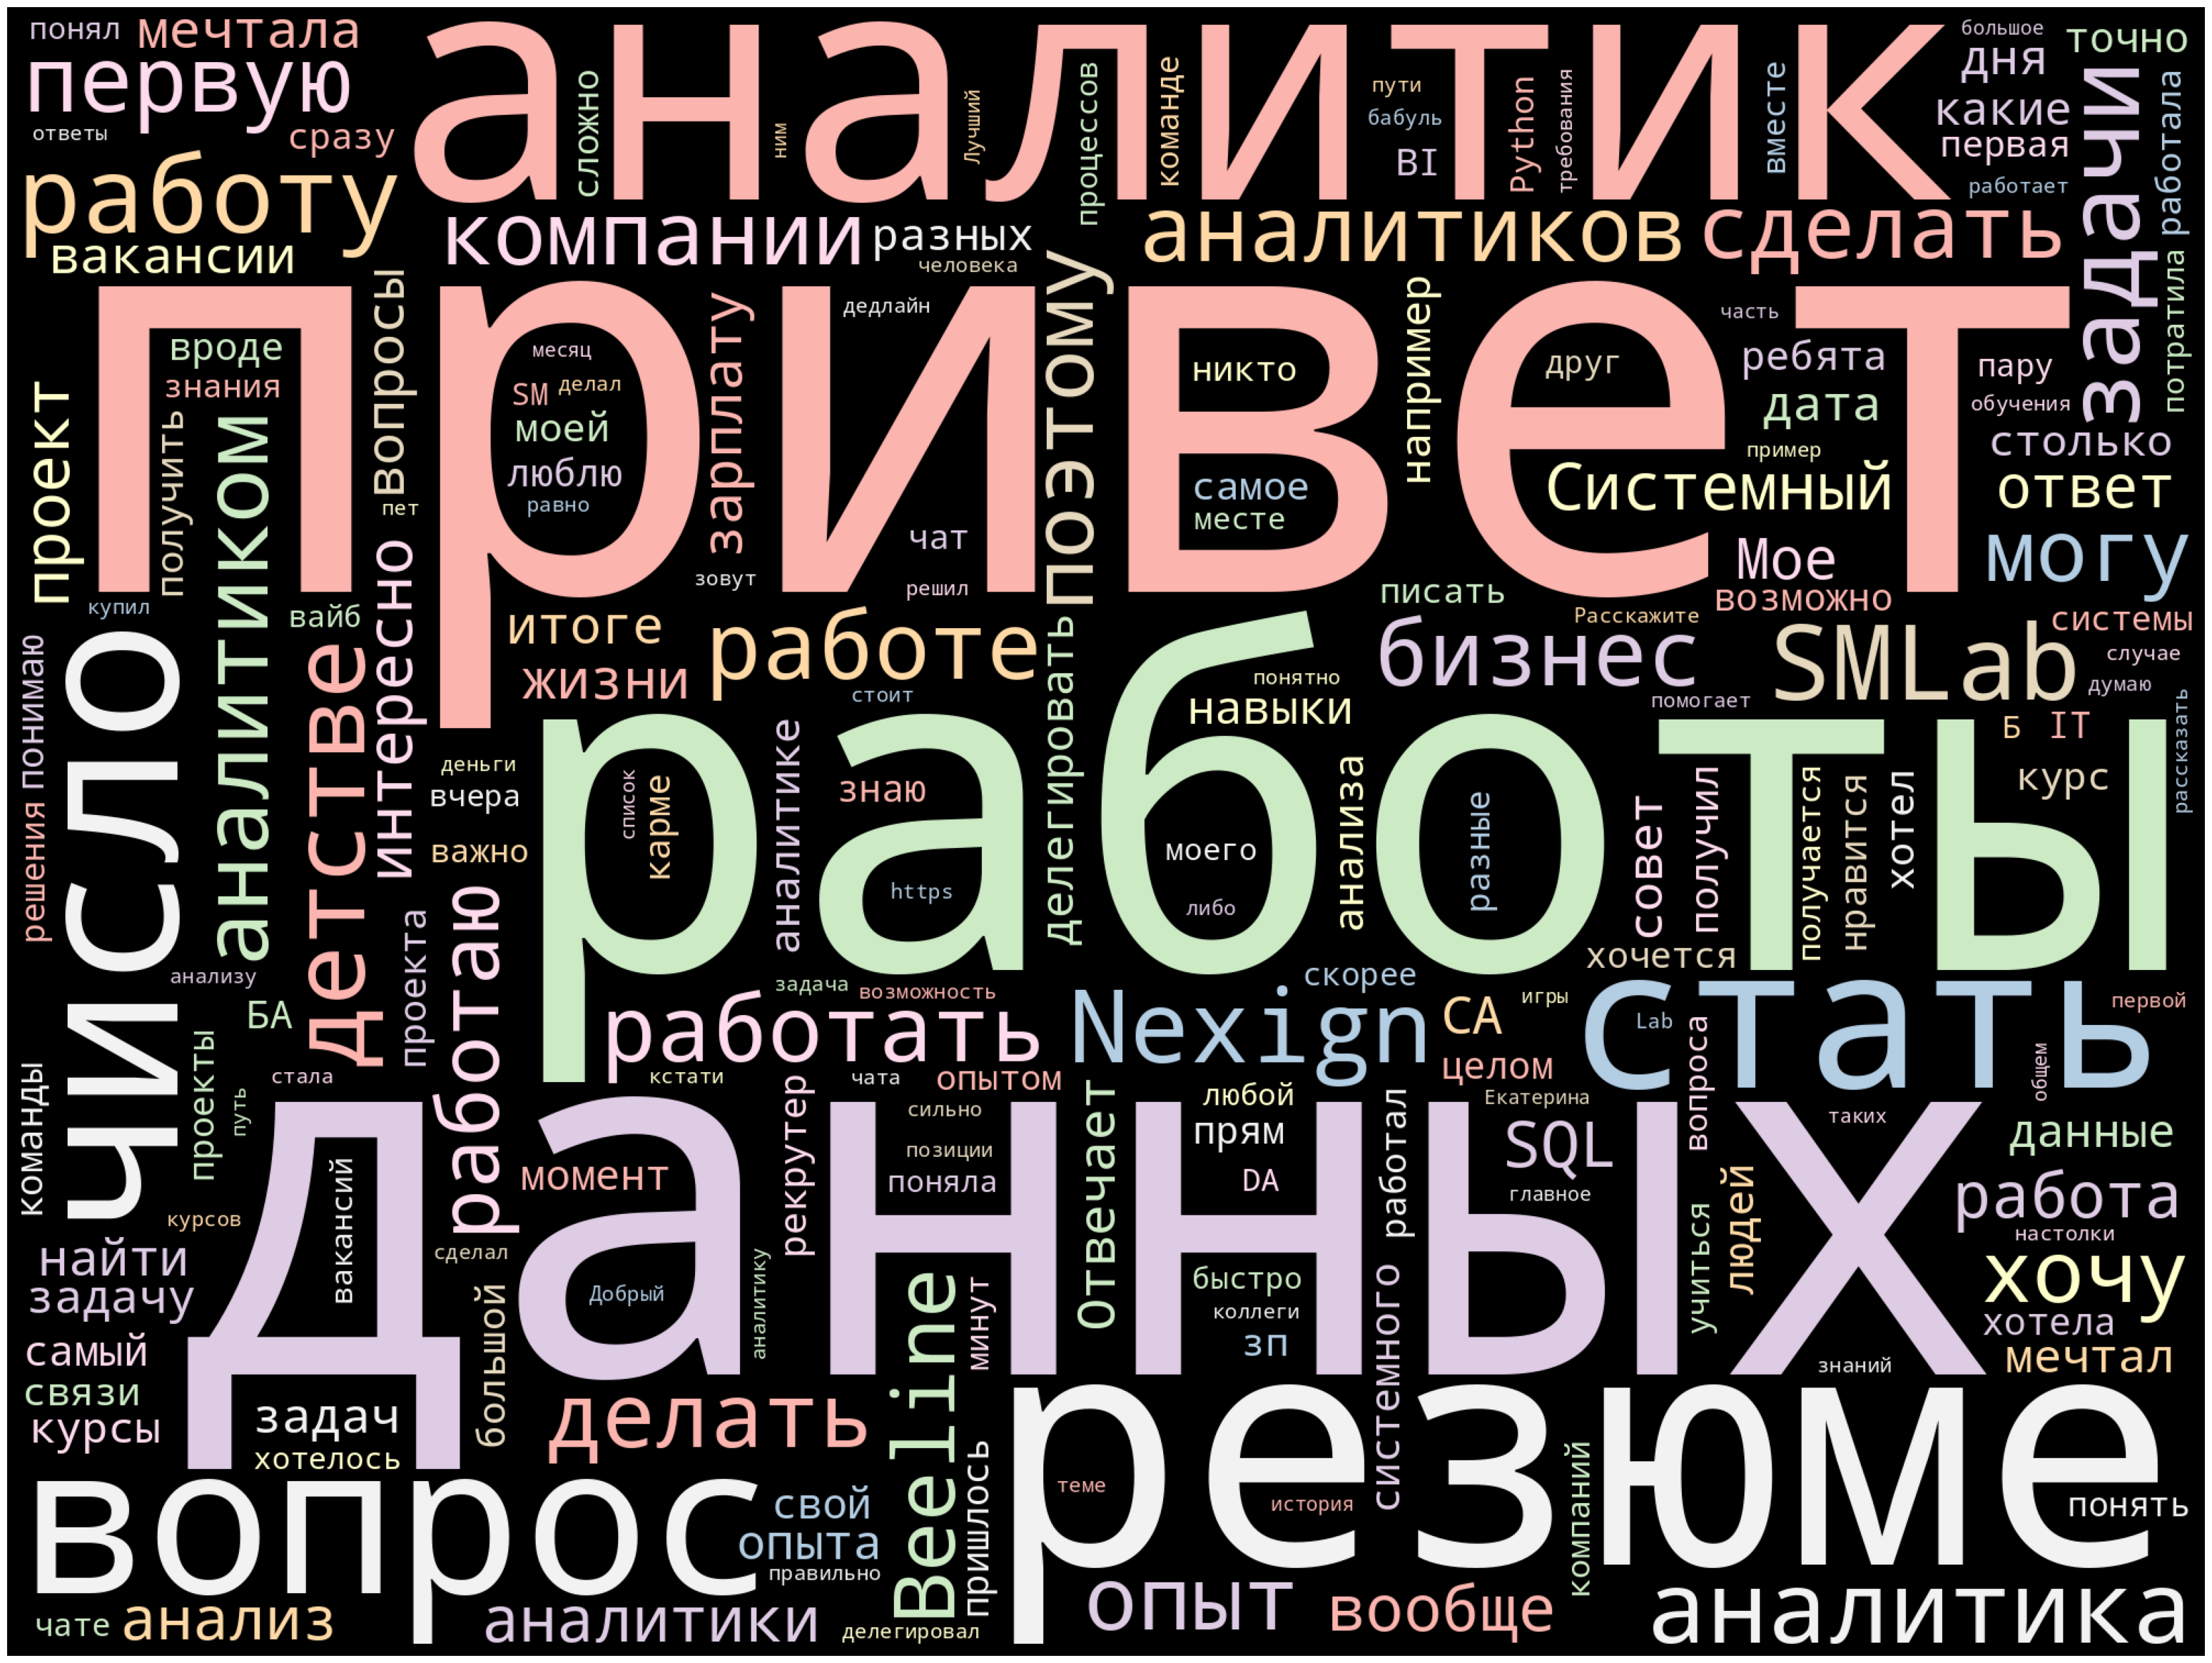

In [38]:
# Импортируем инструменты для облака слов и списки стоп-слов
from wordcloud import WordCloud
from stop_words import get_stop_words

# Записываем в переменную стоп-слова русского языка
STOPWORDS_RU = get_stop_words('russian')

#Вы можете добавить свои стоп-слова в переменную STOPWORDS_RU с помощью метода .add (‘новое стоп-слово’).

# Генерируем облако слов
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)

# Рисуем картинку
plot_cloud(wordcloud)

Видно, что слова нужно леммизировать

Что мы сделаем

Импорт pymorphy2: Импортируем библиотеку для морфологического анализа русского языка.

Создание экземпляра MorphAnalyzer: Создаем объект для выполнения морфологического анализа.

Лемматизация:

morph.parse(word)[0].normal_form — для каждого слова находим его начальную форму (лемму).

all_messages.split() — разбиваем строку на слова, чтобы обработать каждое слово по отдельности.

Результат сохраняется в список lemmas.

Объединение лемм в строку: После лемматизации слова объединяются обратно в строку.


Как альтернатива для леммизации, можно использовать еще polymorph или natasha


In [39]:
!pip install pymorphy2
import pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 57.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=7ed08e2c7635cbf426a8855cee5852181ca2ad42626cfd8732fb49bcae4f2c5e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [40]:
# Создание экземпляра MorphAnalyzer
morph = pymorphy2.MorphAnalyzer()

# Лемматизация текста
lemmas = [morph.parse(word)[0].normal_form for word in text.split()]

# Объединение лемматизированных слов обратно в строку
lemmas_text = ' '.join(lemmas)

# Вывод результата
# lemmas_text

Снова создаем облако

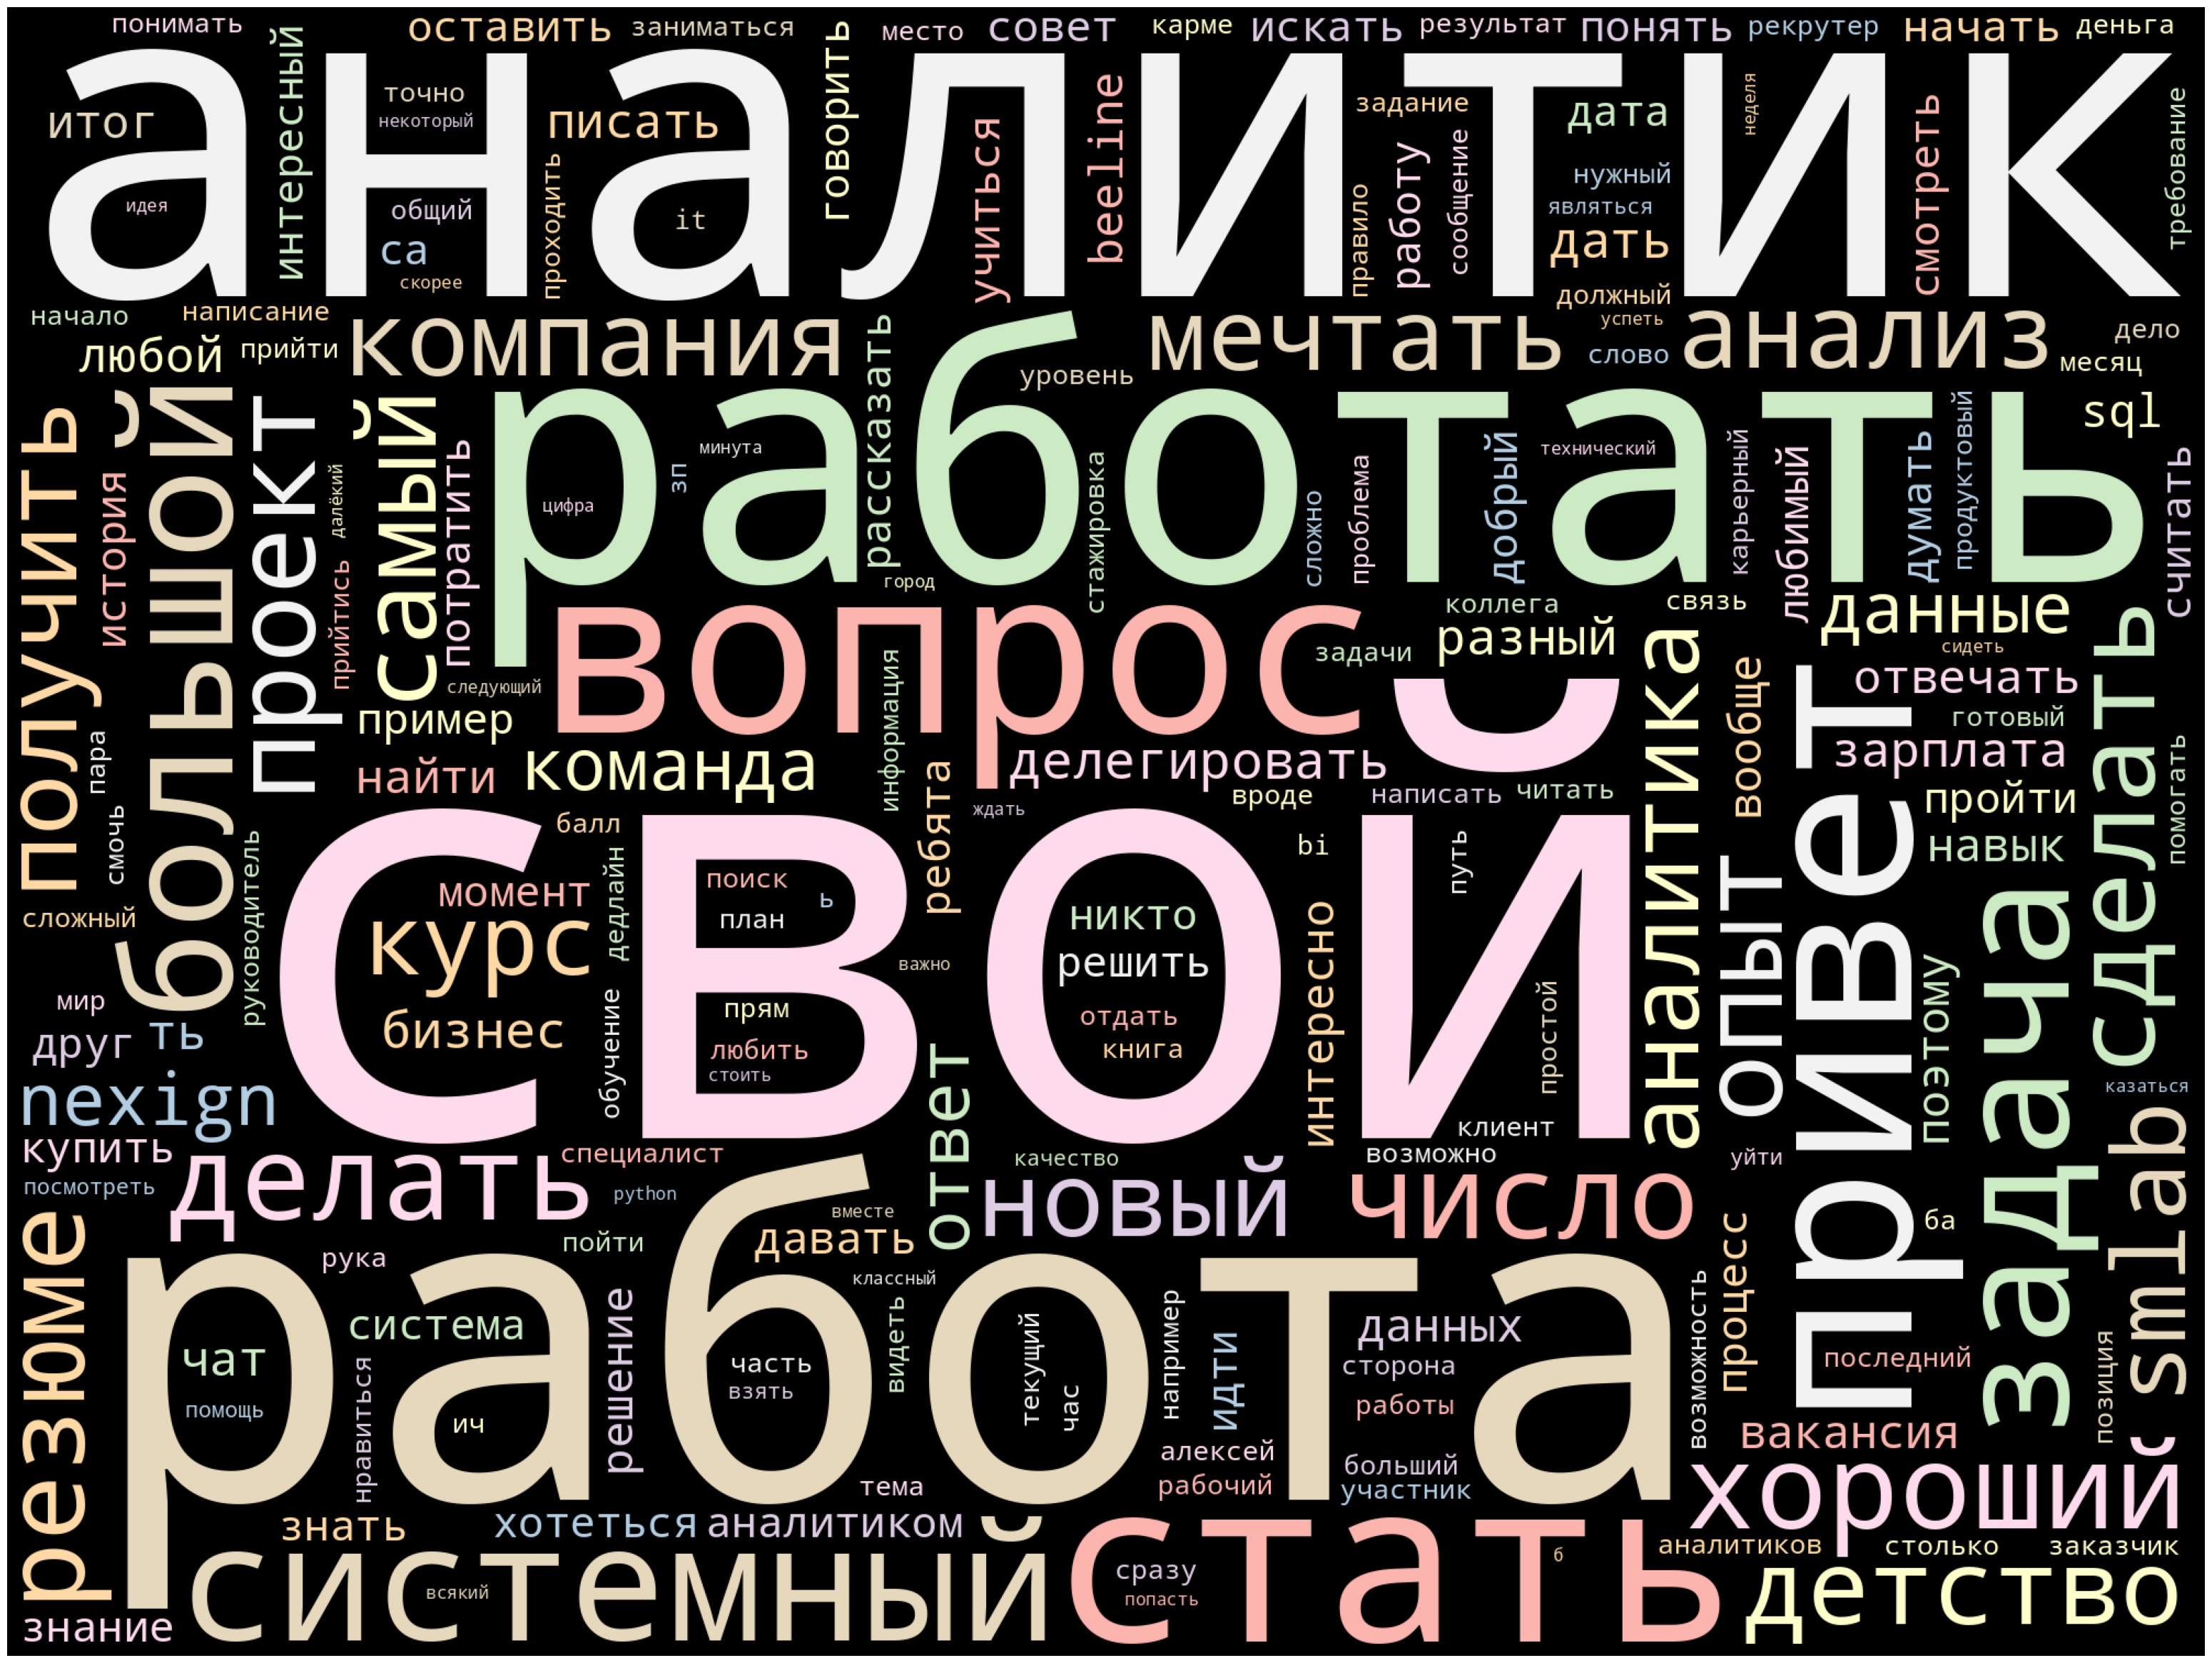

In [41]:
# Записываем в переменную стоп-слова русского языка
STOPWORDS_RU = get_stop_words('russian')

#Вы можете добавить свои стоп-слова в переменную STOPWORDS_RU с помощью метода .add (‘новое стоп-слово’).

# Генерируем облако слов
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(lemmas_text)

# Рисуем картинку
plot_cloud(wordcloud)

In [42]:
# Сохраним получившуюся картинку в файл:
#wordcloud.to_file('hp_cloud_simple.png')

### Облако слов сложной формы

Чтобы сделать облако более замысловатой формы, чем прямоугольник, нам понадобится картинка. Она должна быть достаточно контрастной, лучше всего чёрно-белой, и без мелких деталей.

 После этого перетащите её в список файлов и папок в левой части блокнота.

In [ ]:
# Импортируем необходимое
import numpy as np
from PIL import Image

# Превращаем картинку в маску
mask = np.array(Image.open('/content/upvote.png')) # для примера, если наша картинка называется upvote.png

# Генерируем облако слов
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='white',
                      colormap='Set2',
                      collocations=False,
                      stopwords = STOPWORDS_RU,
                      mask=mask).generate(text)

# Выводим его на экран
plot_cloud(wordcloud)